In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
##reading data
pd.set_option('display.max_columns',None)
df=pd.read_csv("cs.csv")
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [3]:
##checking null values 
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [4]:
## checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [5]:
## checking unique values 
for i in df.columns:
    unique_values = df[i].unique()
    print(f"{i}:\n {unique_values}\n")

ID:
 [  5634   5635   5636 ... 155627 155628 155629]

Customer_ID:
 [ 3392  8625 11708 ... 44897 34304 37932]

Month:
 [1 2 3 4 5 6 7 8]

Name:
 ['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

Age:
 [23. 28. 34. 54. 55. 21. 31. 33. 30. 24. 44. 45. 40. 41. 32. 35. 36. 39.
 37. 20. 46. 26. 42. 19. 48. 38. 43. 22. 16. 18. 15. 27. 25. 14. 17. 47.
 53. 56. 29. 49. 51. 50. 52.]

SSN:
 [8.21000265e+08 4.07583900e+06 4.86853974e+08 ... 1.33167738e+08
 3.13509420e+07 7.87359900e+07]

Occupation:
 ['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']

Annual_Income:
 [ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]

Monthly_Inhand_Salary:
 [ 1824.84333333  3037.98666667 12187.22       ...  3097.00833333
  1929.90666667  3359.41583333]

Num_Bank_Accounts:
 [ 3.  2.  1.  7.  4.  0.  8.  5.  6.  9. 10. 11.]

Num_Cred

In [6]:
##checking duplicate data 
df.duplicated().sum()

0

In [7]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


## Data visualization 

[Text(0, 0, '30384'), Text(0, 0, '45848'), Text(0, 0, '23768')]

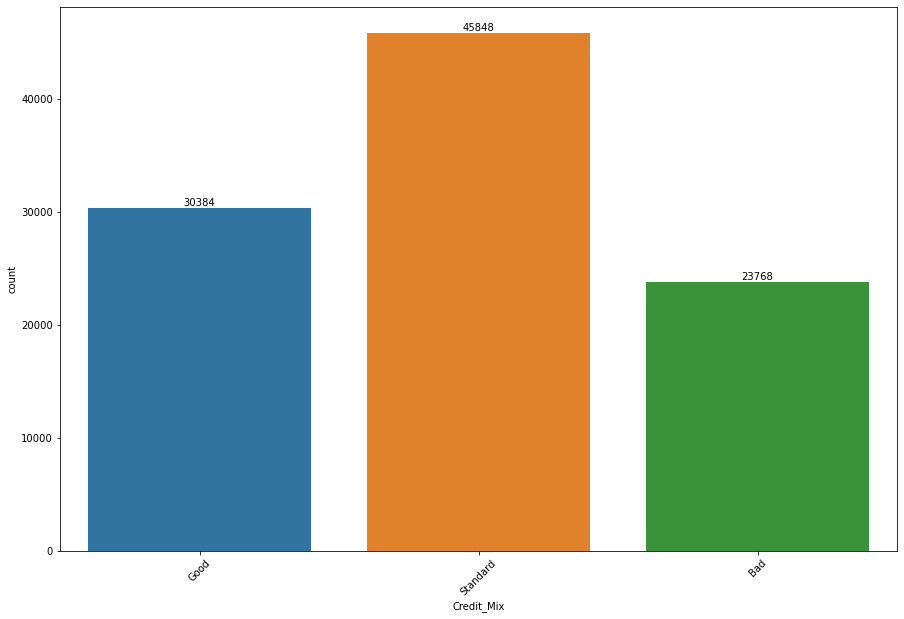

In [8]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x=df['Credit_Mix']);
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])

[Text(0, 0, '11764'),
 Text(0, 0, '10757'),
 Text(0, 0, '14399'),
 Text(0, 0, '28616'),
 Text(0, 0, '19738'),
 Text(0, 0, '14726')]

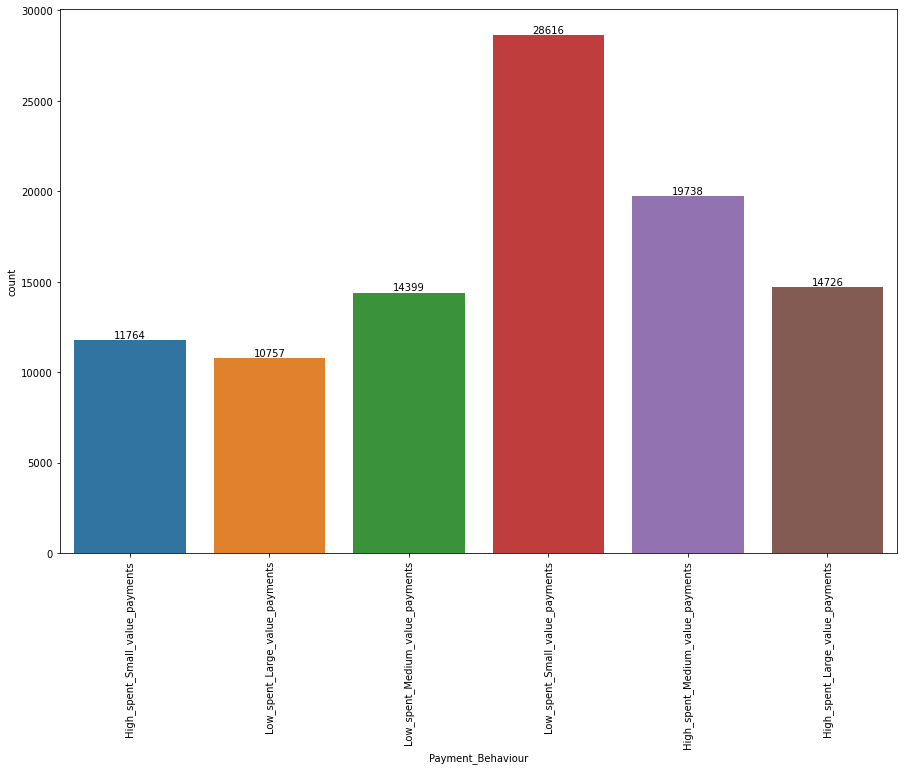

In [9]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x=df['Payment_Behaviour']);
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])

[Text(0, 0, '6744'),
 Text(0, 0, '6672'),
 Text(0, 0, '6864'),
 Text(0, 0, '6648'),
 Text(0, 0, '6720'),
 Text(0, 0, '7096'),
 Text(0, 0, '6720'),
 Text(0, 0, '6568'),
 Text(0, 0, '6536'),
 Text(0, 0, '6432'),
 Text(0, 0, '6744'),
 Text(0, 0, '6352'),
 Text(0, 0, '6776'),
 Text(0, 0, '6304'),
 Text(0, 0, '6824')]

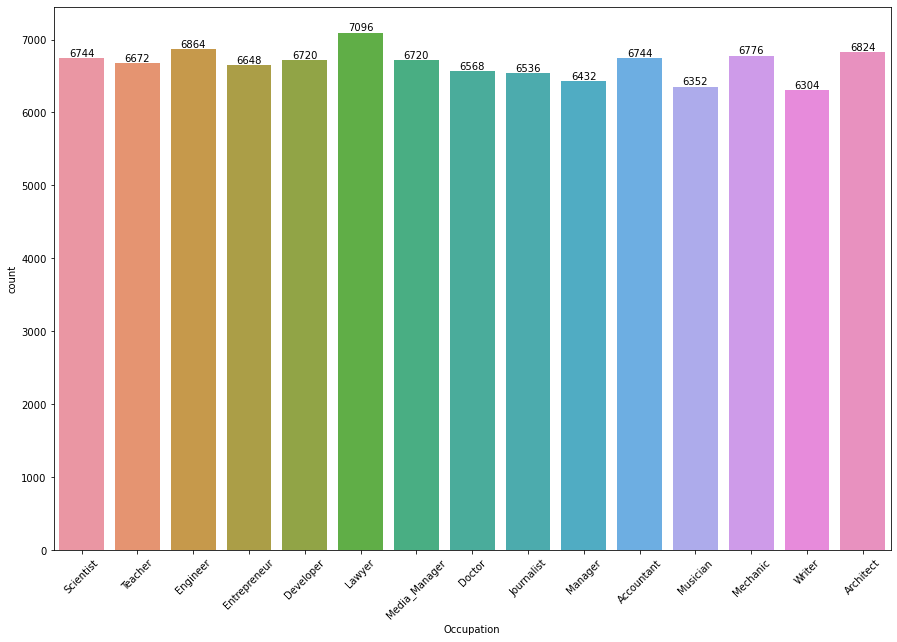

In [10]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x=df['Occupation']);
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])

[Text(0, 0, '11408'),
 Text(0, 0, '1408'),
 Text(0, 0, '1280'),
 Text(0, 0, '1272'),
 Text(0, 0, '1264'),
 Text(0, 0, '1240'),
 Text(0, 0, '1200'),
 Text(0, 0, '1176'),
 Text(0, 0, '1152'),
 Text(0, 0, '1136')]

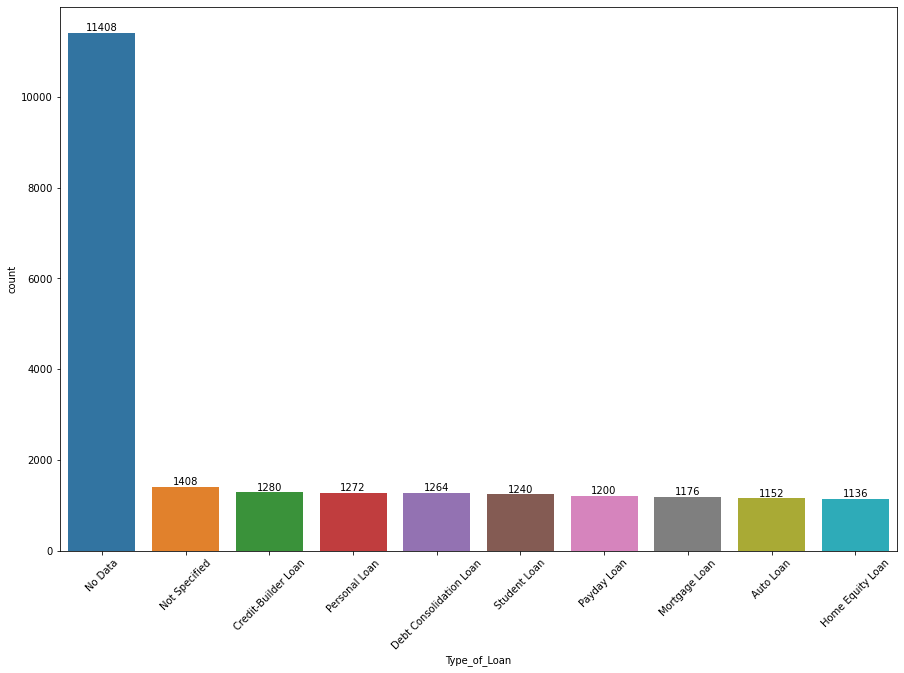

In [11]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x=df['Type_of_Loan'],order=df['Type_of_Loan'].value_counts().head(10).index);
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])

[Text(0, 0, '17828'), Text(0, 0, '53174'), Text(0, 0, '28998')]

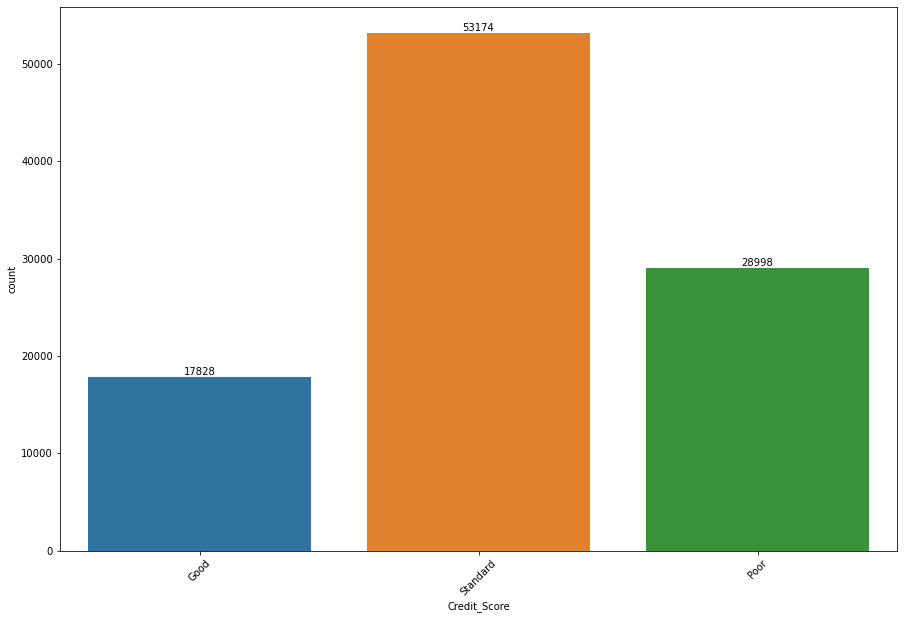

In [12]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x=df['Credit_Score']);
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])

[Text(0, 0, '35667'), Text(0, 0, '12007'), Text(0, 0, '52326')]

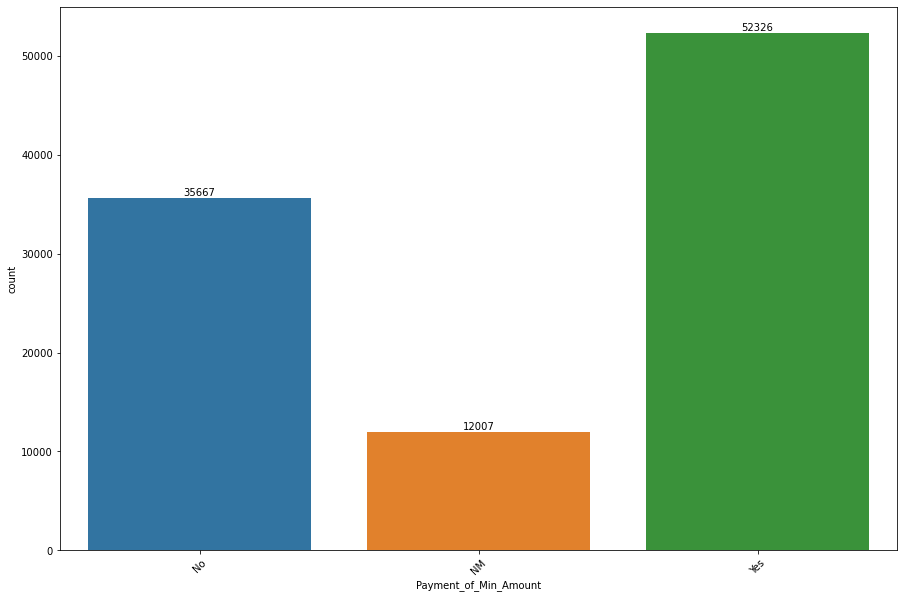

In [13]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x=df['Payment_of_Min_Amount']);
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Count'>

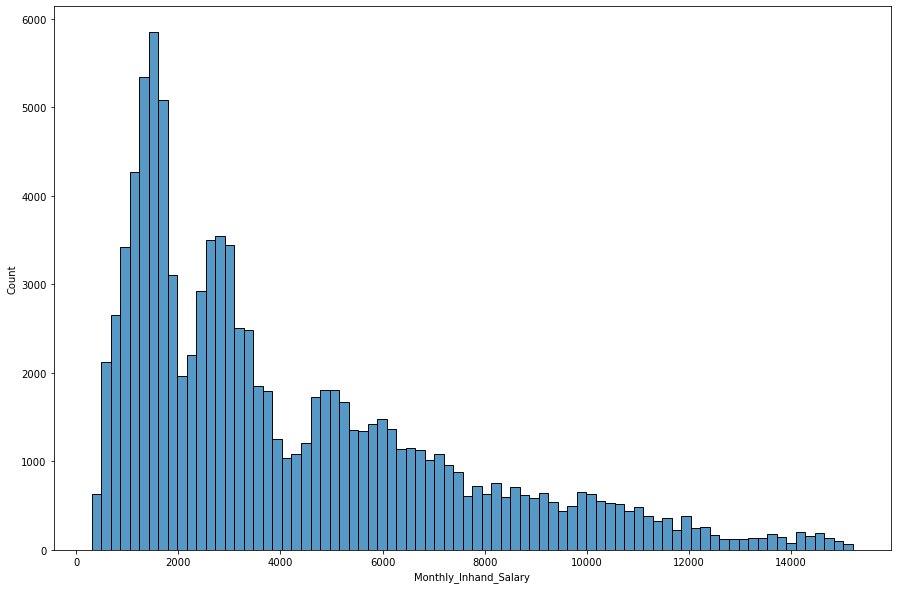

In [14]:
plt.figure(figsize=(15,10))
sns.histplot(df['Monthly_Inhand_Salary'])

<AxesSubplot:xlabel='Num_Bank_Accounts', ylabel='Count'>

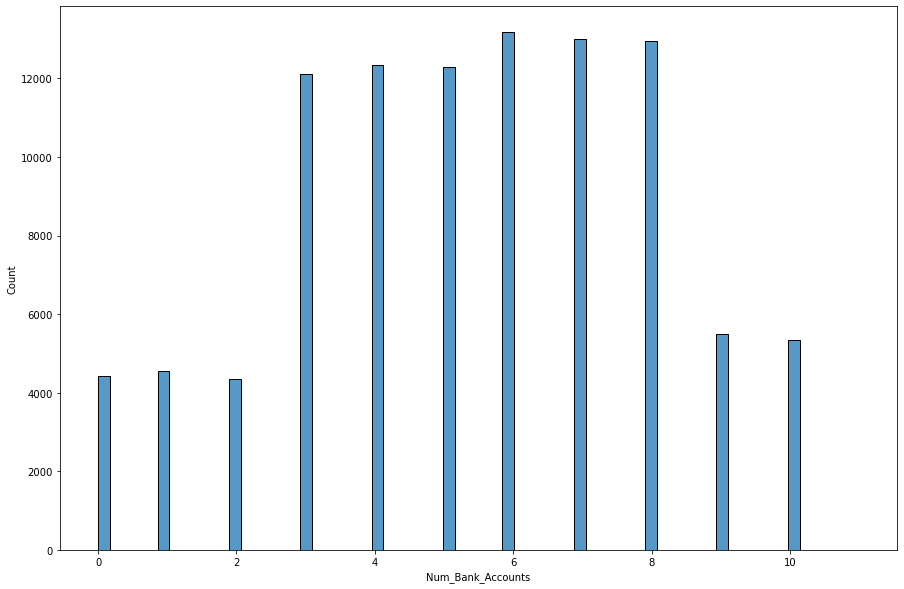

In [15]:
plt.figure(figsize=(15,10))
sns.histplot(df['Num_Bank_Accounts'])

<AxesSubplot:xlabel='Num_Credit_Card', ylabel='Count'>

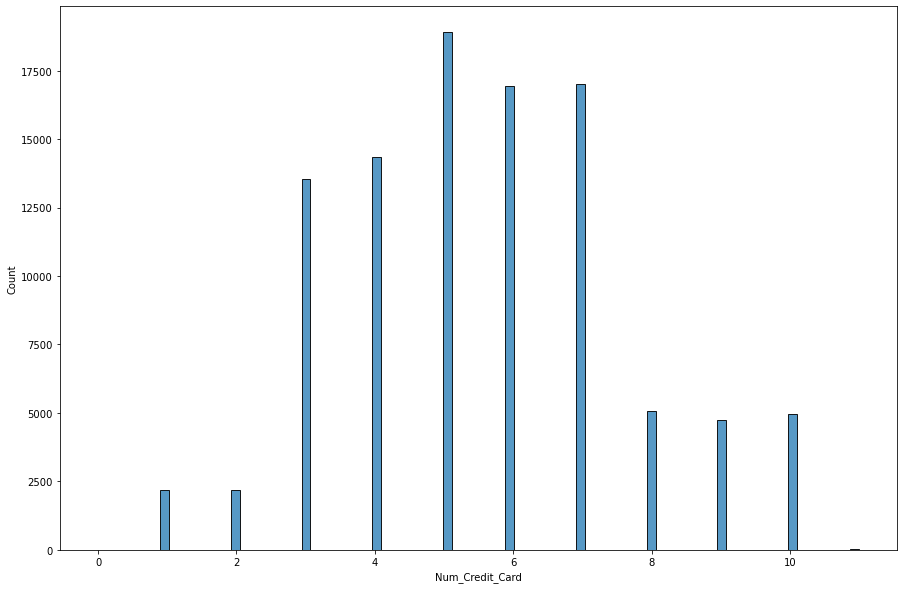

In [16]:
plt.figure(figsize=(15,10))
sns.histplot(df['Num_Credit_Card'])

<AxesSubplot:xlabel='Interest_Rate', ylabel='Count'>

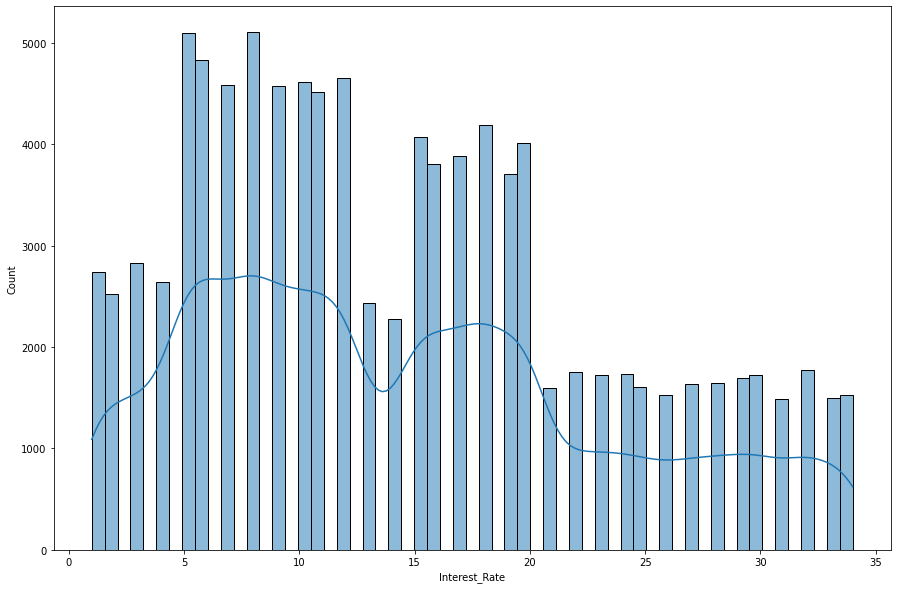

In [17]:
plt.figure(figsize=(15,10))
sns.histplot(df['Interest_Rate'],kde=True)

<AxesSubplot:xlabel='Credit_Utilization_Ratio', ylabel='Count'>

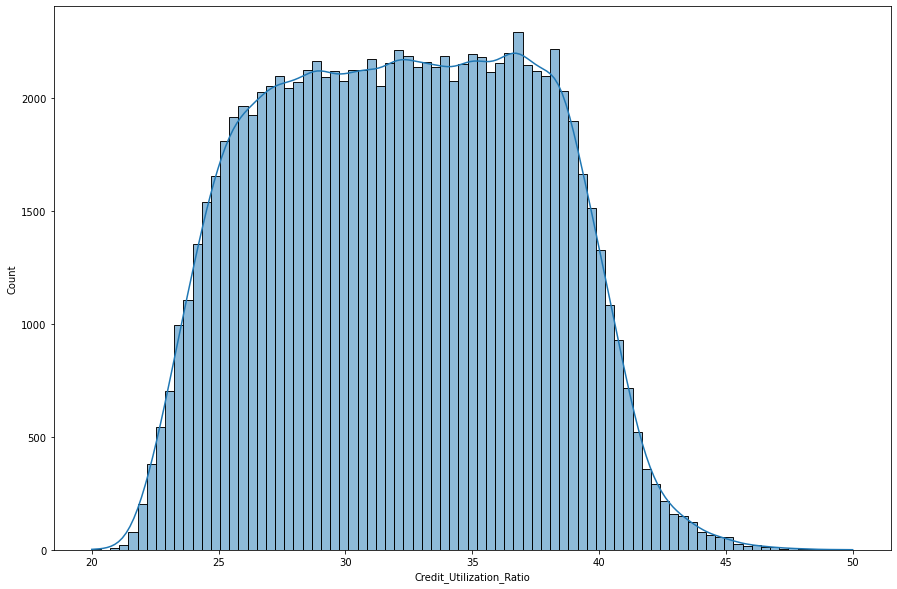

In [18]:
plt.figure(figsize=(15,10))
sns.histplot(df['Credit_Utilization_Ratio'],kde=True)

<AxesSubplot:xlabel='Delay_from_due_date', ylabel='Count'>

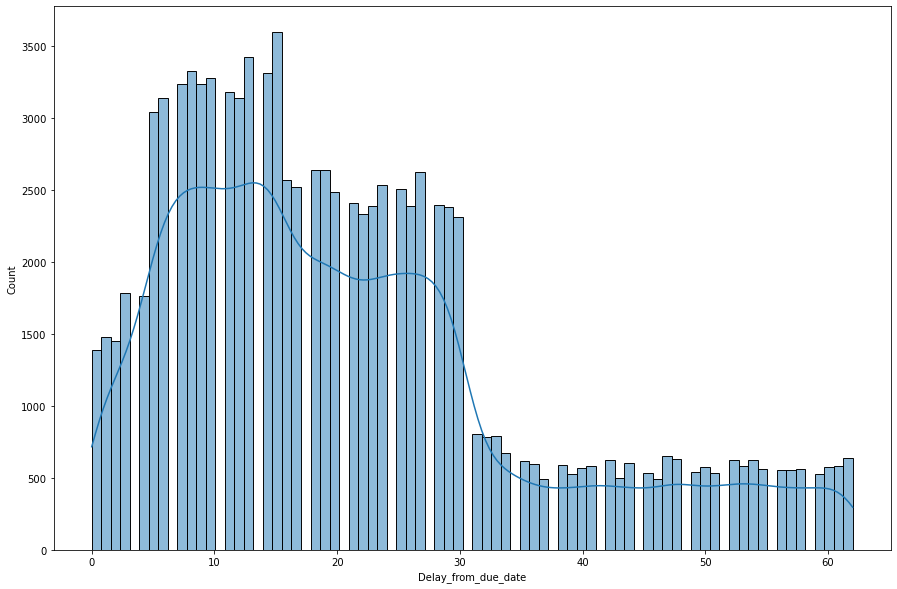

In [19]:
plt.figure(figsize=(15,10))
sns.histplot(df['Delay_from_due_date'],kde=True)

<AxesSubplot:xlabel='Monthly_Balance', ylabel='Count'>

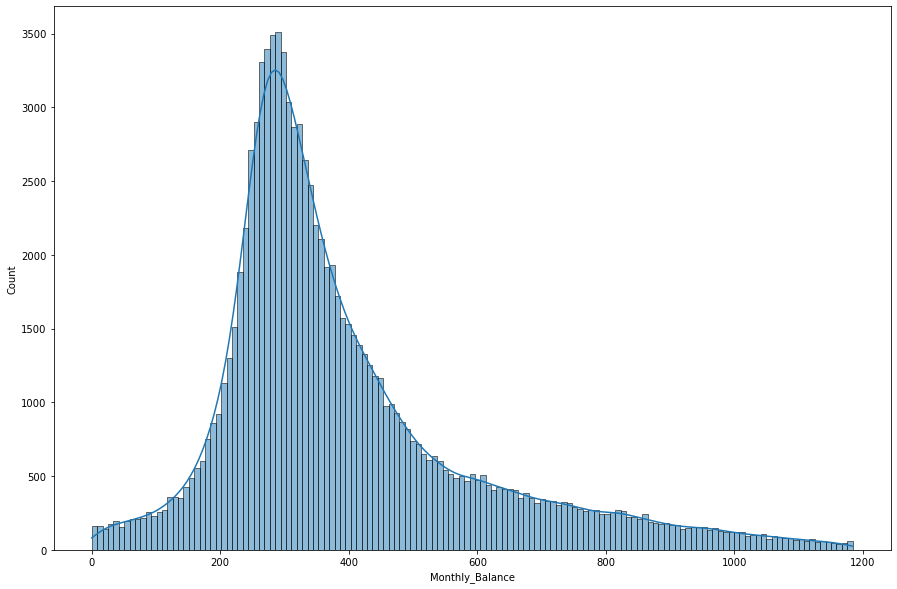

In [20]:
plt.figure(figsize=(15,10))
sns.histplot(df['Monthly_Balance'],kde=True)

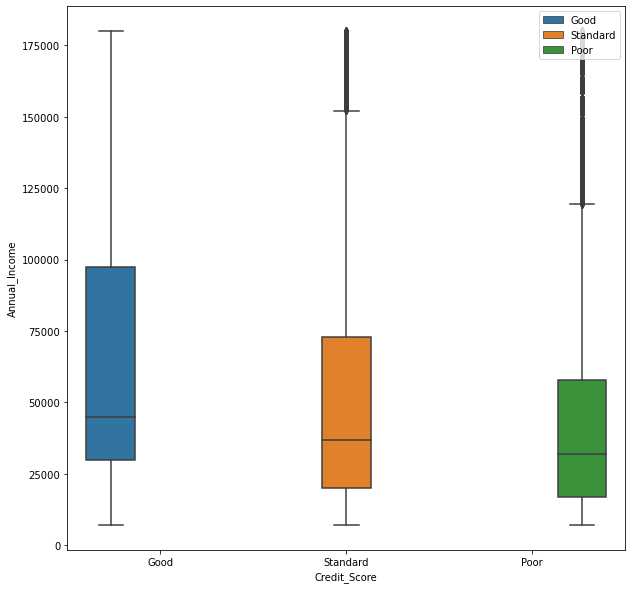

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df['Annual_Income'],x=df['Credit_Score'],hue=df['Credit_Score'])
plt.legend(loc='upper right')
plt.show()             

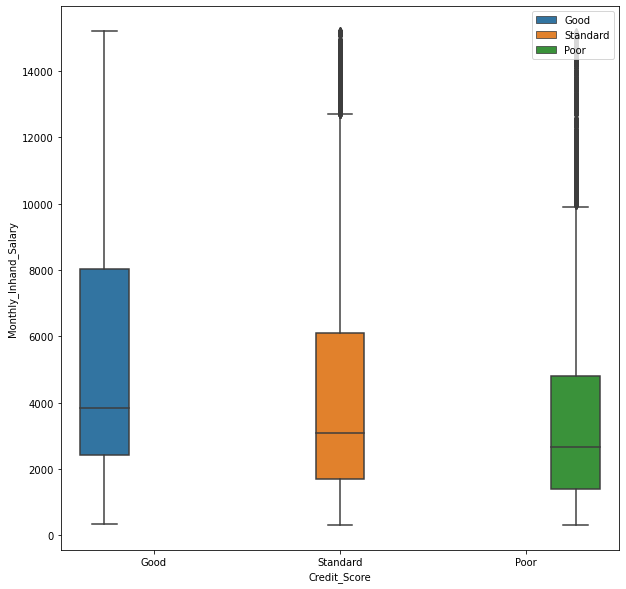

In [22]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df['Monthly_Inhand_Salary'],x=df['Credit_Score'],hue=df['Credit_Score'])
plt.legend(loc='upper right')
plt.show()             

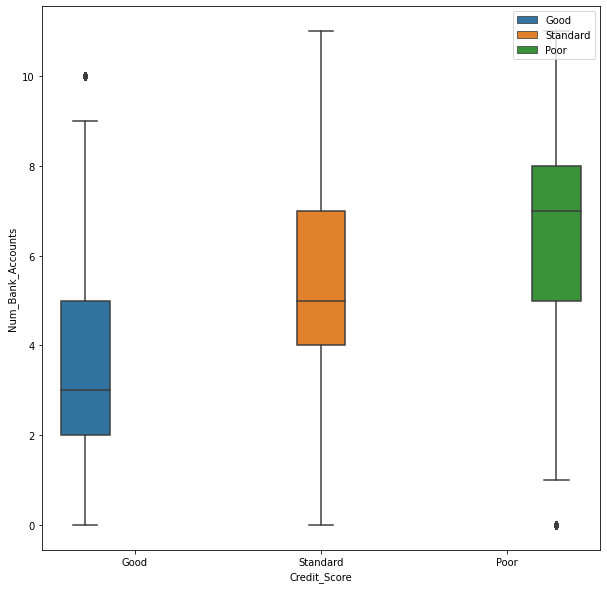

In [23]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df['Num_Bank_Accounts'],x=df['Credit_Score'],hue=df['Credit_Score'])
plt.legend(loc='upper right')
plt.show()             

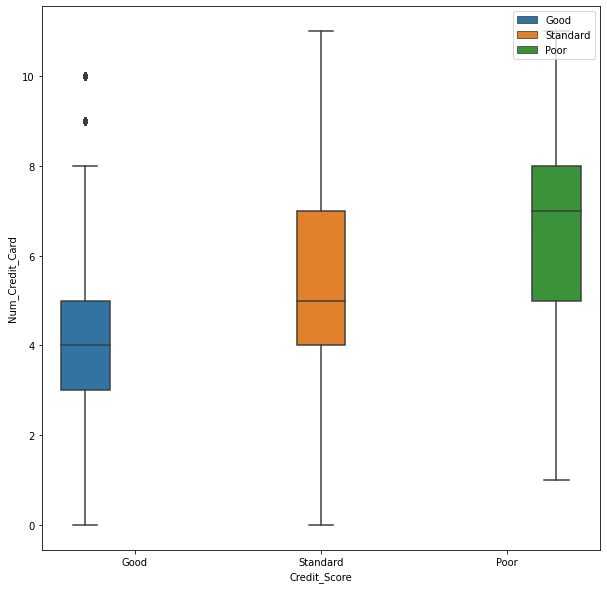

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df['Num_Credit_Card'],x=df['Credit_Score'],hue=df['Credit_Score'])
plt.legend(loc='upper right')
plt.show()             

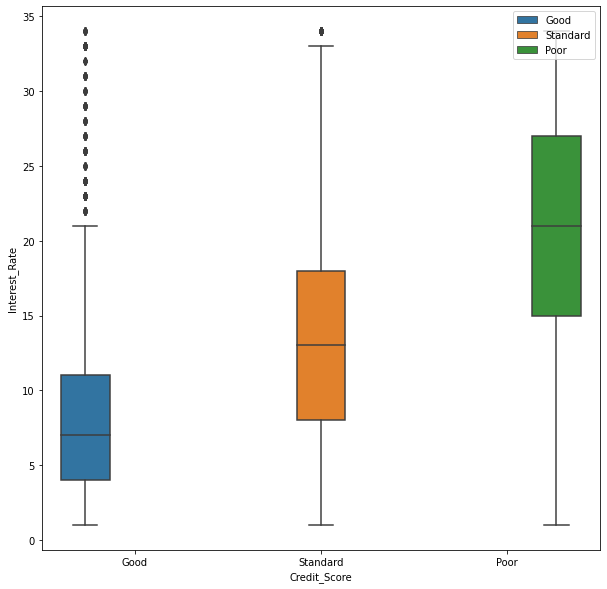

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df['Interest_Rate'],x=df['Credit_Score'],hue=df['Credit_Score'])
plt.legend(loc='upper right')
plt.show()             

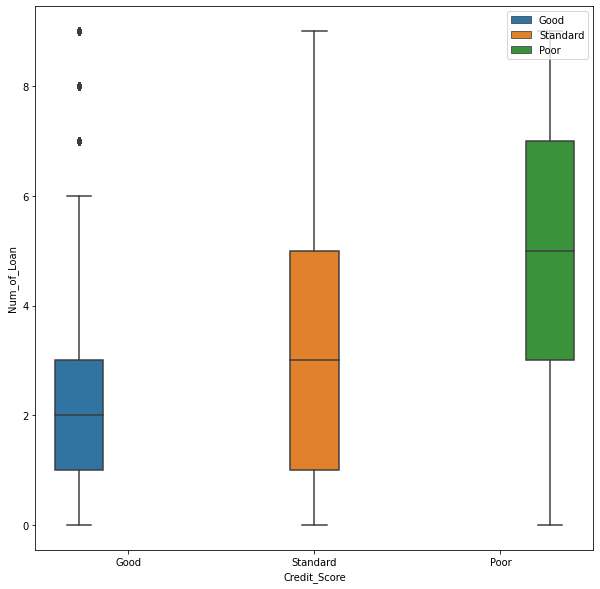

In [26]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df['Num_of_Loan'],x=df['Credit_Score'],hue=df['Credit_Score'])
plt.legend(loc='upper right')
plt.show()             

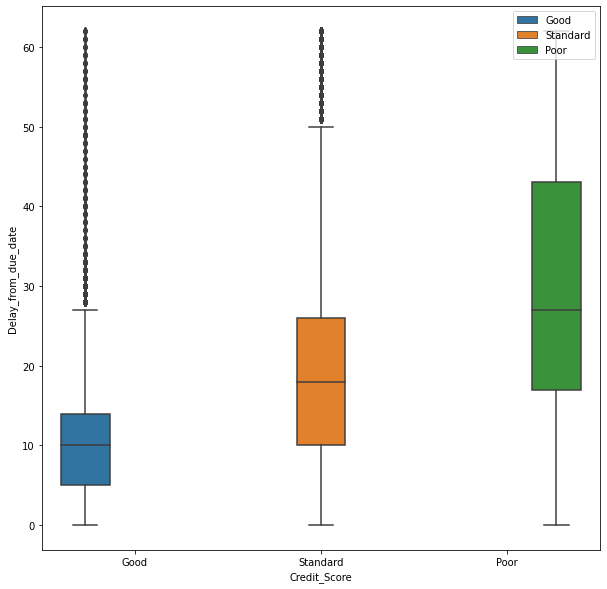

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df['Delay_from_due_date'],x=df['Credit_Score'],hue=df['Credit_Score'])
plt.legend(loc='upper right')
plt.show()             

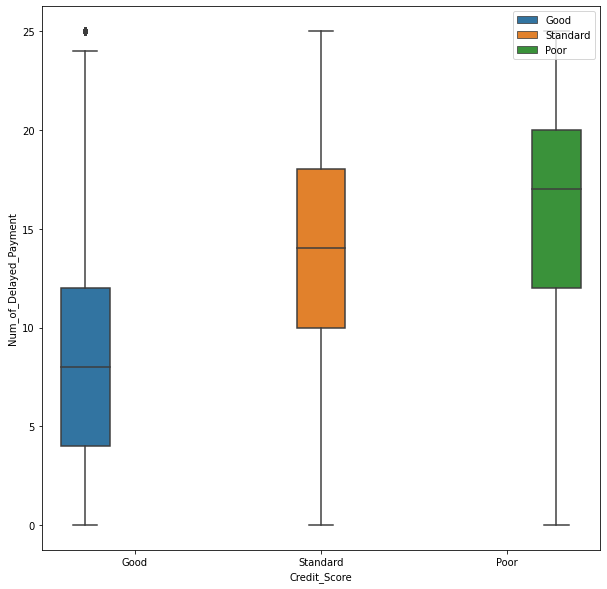

In [28]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df['Num_of_Delayed_Payment'],x=df['Credit_Score'],hue=df['Credit_Score'])
plt.legend(loc='upper right')
plt.show()             

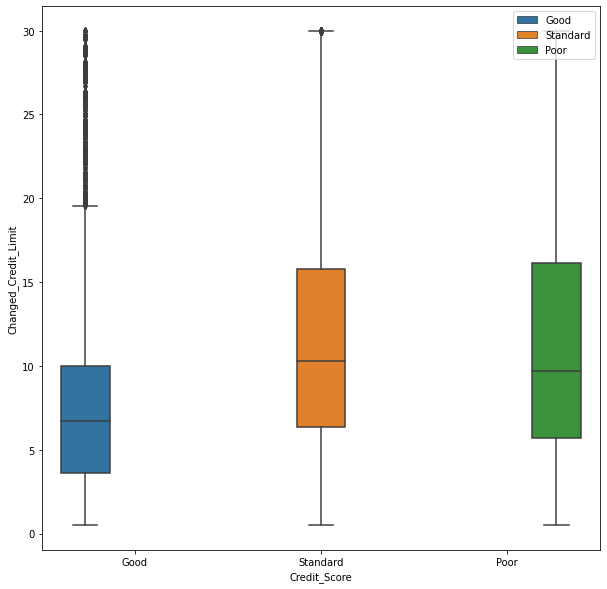

In [29]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df['Changed_Credit_Limit'],x=df['Credit_Score'],hue=df['Credit_Score'])
plt.legend(loc='upper right')
plt.show()             

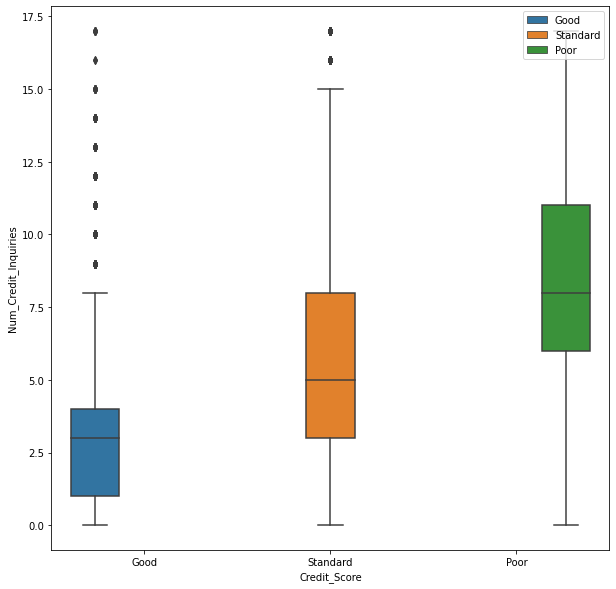

In [30]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df['Num_Credit_Inquiries'],x=df['Credit_Score'],hue=df['Credit_Score'])
plt.legend(loc='upper right')
plt.show()             

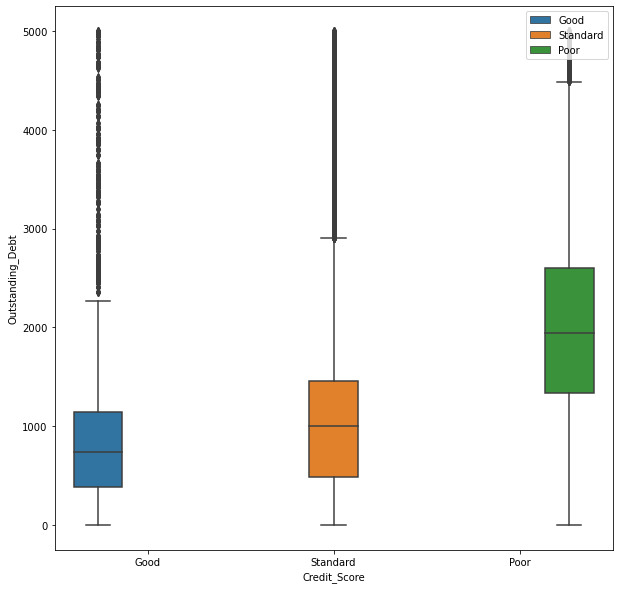

In [31]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df['Outstanding_Debt'],x=df['Credit_Score'],hue=df['Credit_Score'])
plt.legend(loc='upper right')
plt.show()             

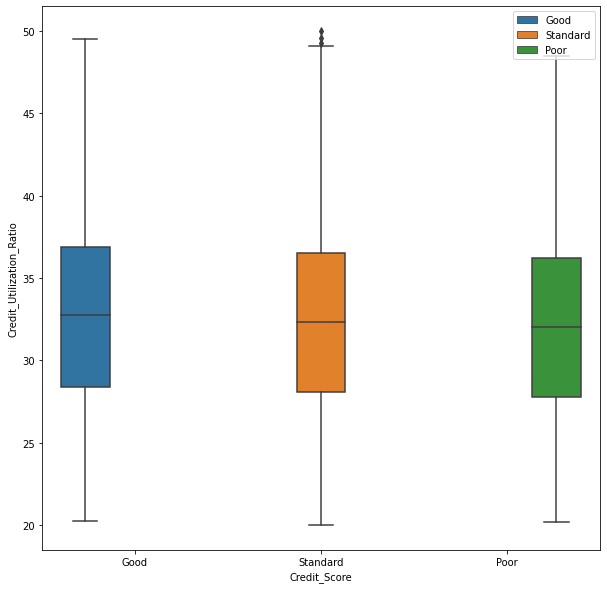

In [32]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df['Credit_Utilization_Ratio'],x=df['Credit_Score'],hue=df['Credit_Score'])
plt.legend(loc='upper right')
plt.show()             

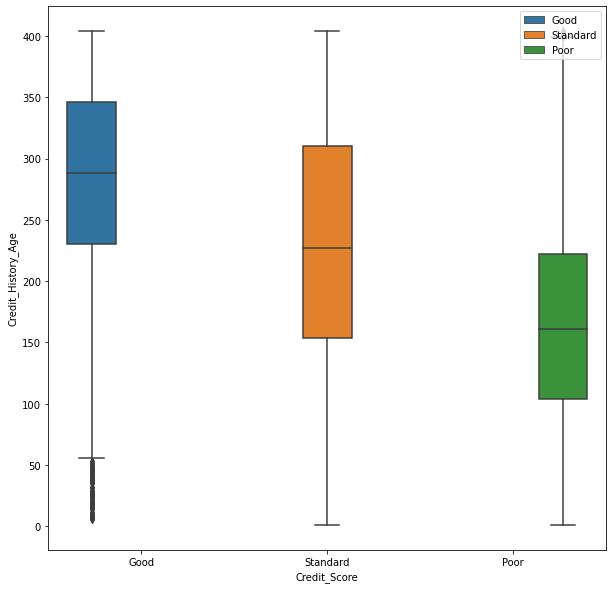

In [33]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df['Credit_History_Age'],x=df['Credit_Score'],hue=df['Credit_Score'])
plt.legend(loc='upper right')
plt.show()             

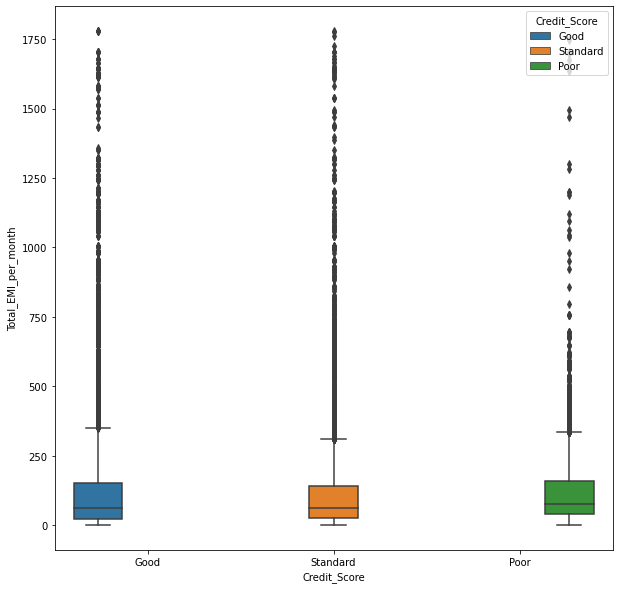

In [34]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df['Total_EMI_per_month'],x=df['Credit_Score'],hue=df['Credit_Score'])
plt.show()             

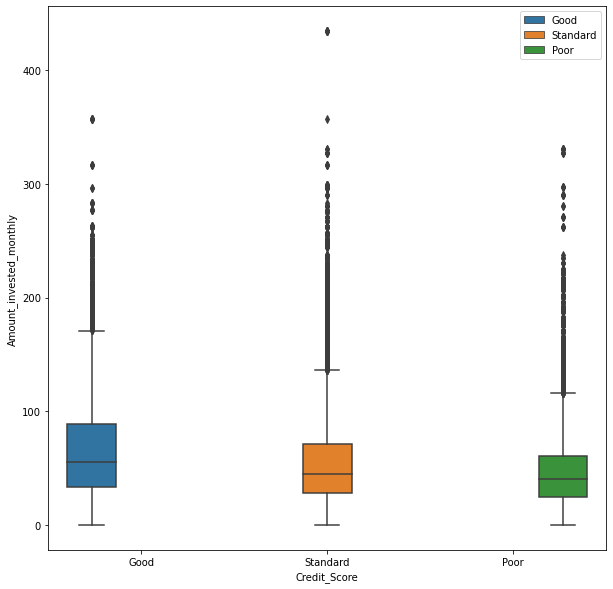

In [35]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df['Amount_invested_monthly'],x=df['Credit_Score'],hue=df['Credit_Score'])
plt.legend(loc='upper right')
plt.show()             

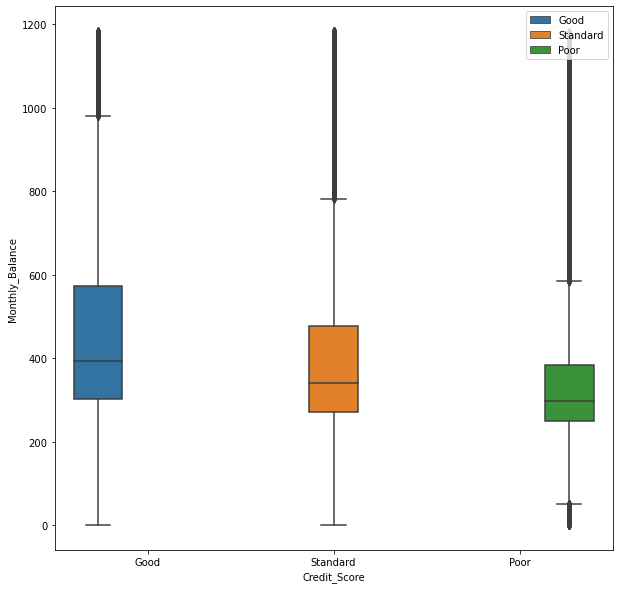

In [36]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df['Monthly_Balance'],x=df['Credit_Score'],hue=df['Credit_Score'])
plt.legend(loc='upper right')
plt.show()             

## Data Cleaning 

In [37]:
## checking unique values 
for i in df.columns:
    unique_values = df[i].unique()
    print(f"{i}:\n {unique_values}\n")

ID:
 [  5634   5635   5636 ... 155627 155628 155629]

Customer_ID:
 [ 3392  8625 11708 ... 44897 34304 37932]

Month:
 [1 2 3 4 5 6 7 8]

Name:
 ['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

Age:
 [23. 28. 34. 54. 55. 21. 31. 33. 30. 24. 44. 45. 40. 41. 32. 35. 36. 39.
 37. 20. 46. 26. 42. 19. 48. 38. 43. 22. 16. 18. 15. 27. 25. 14. 17. 47.
 53. 56. 29. 49. 51. 50. 52.]

SSN:
 [8.21000265e+08 4.07583900e+06 4.86853974e+08 ... 1.33167738e+08
 3.13509420e+07 7.87359900e+07]

Occupation:
 ['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']

Annual_Income:
 [ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]

Monthly_Inhand_Salary:
 [ 1824.84333333  3037.98666667 12187.22       ...  3097.00833333
  1929.90666667  3359.41583333]

Num_Bank_Accounts:
 [ 3.  2.  1.  7.  4.  0.  8.  5.  6.  9. 10. 11.]

Num_Cred

In [38]:
## Bank typically lends money to people over the age of 18, So I have to remove those records

In [39]:
df=df[~(df['Age'].isin([14.,15.,16.,17.,18.]))]

In [40]:
## I have to remove some columns because they don't have an impact on our model.

In [41]:
## removing unuseful Columns
df.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN','Type_of_Loan',
                'Changed_Credit_Limit','Total_EMI_per_month', 'Amount_invested_monthly'],inplace=True)

In [42]:
df.columns

Index(['Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [43]:
df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].replace("NM","No")

In [44]:
df['Payment_of_Min_Amount'].value_counts()

No     46034
Yes    45671
Name: Payment_of_Min_Amount, dtype: int64

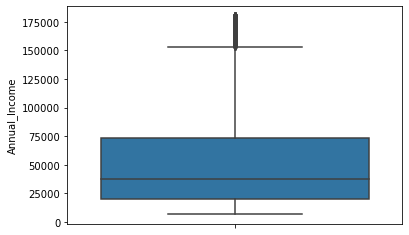

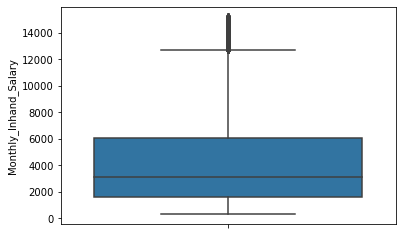

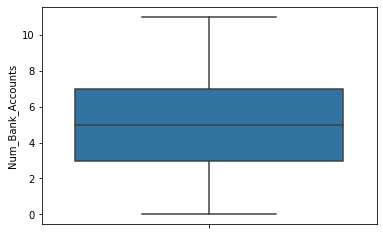

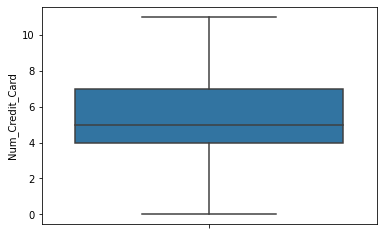

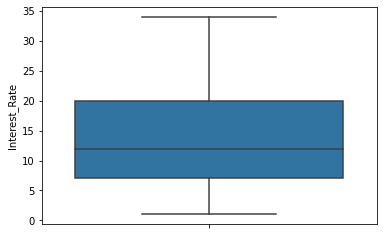

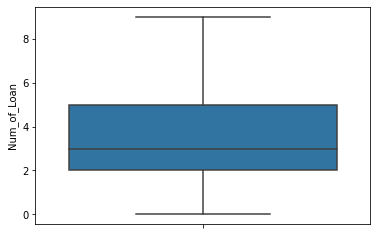

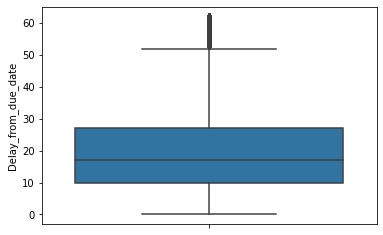

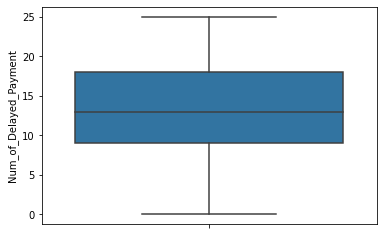

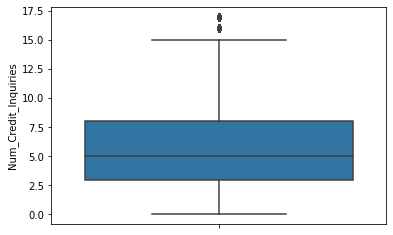

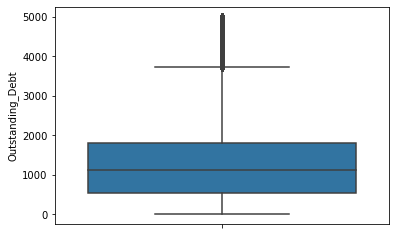

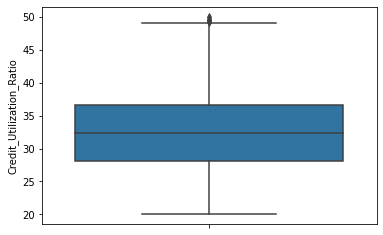

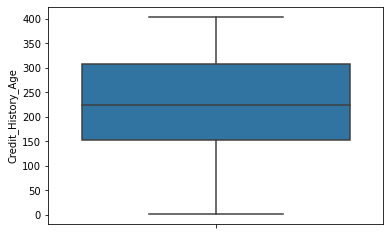

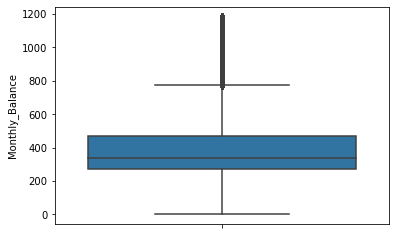

In [45]:
col=['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 
       'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age','Monthly_Balance']
for i in col:
    plt.figure()
    sns.boxplot(y=df[i])

In [46]:
## No outlier in dataset 

In [47]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [48]:
df['Credit_Score']=df['Credit_Score'].map({'Good': 2 , 'Standard' : 1 , 'Poor' : 0})

In [49]:
df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [50]:
df['Credit_Mix']=df['Credit_Mix'].map({'Good': 2 , 'Standard' : 1 , 'Bad' : 0})

## Label Encoding to treat Categorical data


In [51]:
##label encoding 

col1=['Payment_of_Min_Amount', 'Occupation' ,'Payment_Behaviour']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for c in col1:
    df[c]=le.fit_transform(df[c])

## Splitting Data

In [52]:
X=df[['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Occupation' ,
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Monthly_Balance']].values
Y=df['Credit_Score'].values

## Apply oversampling

Data is Not 100% balanced

In [53]:
df['Credit_Score'].value_counts(normalize=True)

1    0.532894
0    0.278753
2    0.188354
Name: Credit_Score, dtype: float64

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
a = SMOTE(sampling_strategy='auto')

In [56]:
X_a , Y_a = a.fit_resample(X , Y)

In [57]:
pd.DataFrame(Y_a).value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
dtype: float64

## Split into train and test sets

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X_a ,Y_a, test_size=0.3, random_state=1)

## LogisticRegression

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train1=sc.fit_transform(X_train)
X_test1=sc.transform(X_test)

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [61]:
lr.fit(X_train1, Y_train)

LogisticRegression()

In [62]:
Y_pred=lr.predict(X_test1)

## DecisionTreeClassifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [64]:
Y_pred1=dc.predict(X_test)

## RandomForestClassifier

In [65]:
## Hyperparameter Tuning

In [66]:
random_grid={
    'n_estimators': [10,20,30,40,50],
    'max_features': ["sqrt","log2"],
    'max_depth': [6,7,8,9,10],
    'criterion': ["gini","entropy"],
}

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [68]:
from sklearn.model_selection import RandomizedSearchCV
rscv=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=5, cv=5, n_jobs=-1)

In [69]:
rscv.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [6, 7, 8, 9, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [10, 20, 30, 40, 50]})

In [70]:
a=rscv.best_params_

In [71]:
rf_final=RandomForestClassifier(n_estimators=a['n_estimators'],max_features=a['max_features'], 
                                max_depth=a['max_depth'],criterion=a['criterion'])

In [72]:
rf_final.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=30)

In [73]:
Y_pred2=rf_final.predict(X_test)

## model evaluation


In [74]:
print("LogisticRegression_accuracy_score  :",accuracy_score(Y_test, Y_pred))
print("DecisionTreeClassifier_accuracy_score  :",accuracy_score(Y_test, Y_pred1))
print("RandomForestClassifier_accuracy_score  :",accuracy_score(Y_test, Y_pred2))

LogisticRegression_accuracy_score  : 0.6908805674919856
DecisionTreeClassifier_accuracy_score  : 0.7740945365254758
RandomForestClassifier_accuracy_score  : 0.750699133756224


In [75]:
print("LogisticRegression_confusion_matrix  :\n\n",confusion_matrix(Y_test, Y_pred))
print()
print("DecisionTreeClassifier_confusion_matrix  :\n\n",confusion_matrix(Y_test, Y_pred1))
print()
print("RandomForestClassifier_confusion_matrix  :\n\n",confusion_matrix(Y_test, Y_pred2))

LogisticRegression_confusion_matrix  :

 [[ 9450  2430  2663]
 [ 3226  8456  3054]
 [  358  1865 12481]]

DecisionTreeClassifier_confusion_matrix  :

 [[11480  2194   869]
 [ 2348 10545  1843]
 [  929  1753 12022]]

RandomForestClassifier_confusion_matrix  :

 [[11615   961  1967]
 [ 3304  8566  2866]
 [  407  1460 12837]]


In [76]:
print("LogisticRegression_classification_report  :\n\n",classification_report(Y_test, Y_pred))
print("DecisionTreeClassifier_classification_report  :\n\n",classification_report(Y_test, Y_pred1))
print("RandomForestClassifier_classification_report :\n\n",classification_report(Y_test, Y_pred2))

LogisticRegression_classification_report  :

               precision    recall  f1-score   support

           0       0.73      0.65      0.69     14543
           1       0.66      0.57      0.62     14736
           2       0.69      0.85      0.76     14704

    accuracy                           0.69     43983
   macro avg       0.69      0.69      0.69     43983
weighted avg       0.69      0.69      0.69     43983

DecisionTreeClassifier_classification_report  :

               precision    recall  f1-score   support

           0       0.78      0.79      0.78     14543
           1       0.73      0.72      0.72     14736
           2       0.82      0.82      0.82     14704

    accuracy                           0.77     43983
   macro avg       0.77      0.77      0.77     43983
weighted avg       0.77      0.77      0.77     43983

RandomForestClassifier_classification_report :

               precision    recall  f1-score   support

           0       0.76      0.80     